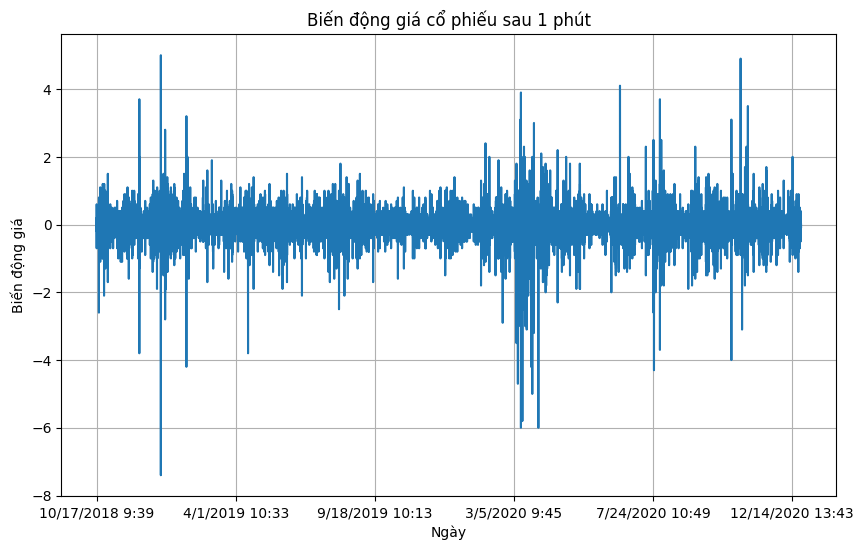

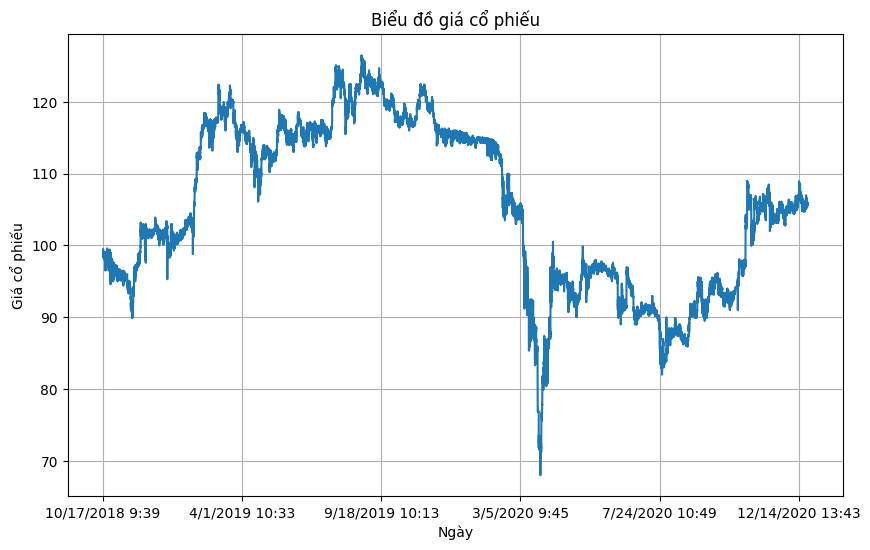

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv("/content/drive/MyDrive/data/VIC.csv")

# Đặt cột "Date/Time" làm chỉ số của DataFrame
df.set_index('Date/Time', inplace=True)

# Tính toán biến động giá cổ phiếu sau 1 phút
price_volatility = df['Close'].shift(-1) - df['Close']

# Vẽ biểu đồ biến động giá
plt.figure(figsize=(10, 6))
price_volatility.plot()
plt.title('Biến động giá cổ phiếu sau 1 phút')
plt.xlabel('Ngày')
plt.ylabel('Biến động giá')
plt.grid(True)
plt.show()

# Vẽ biểu đồ giá cổ phiếu
plt.figure(figsize=(10, 6))
df['Close'].plot()
plt.title('Biểu đồ giá cổ phiếu')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.grid(True)
plt.show()


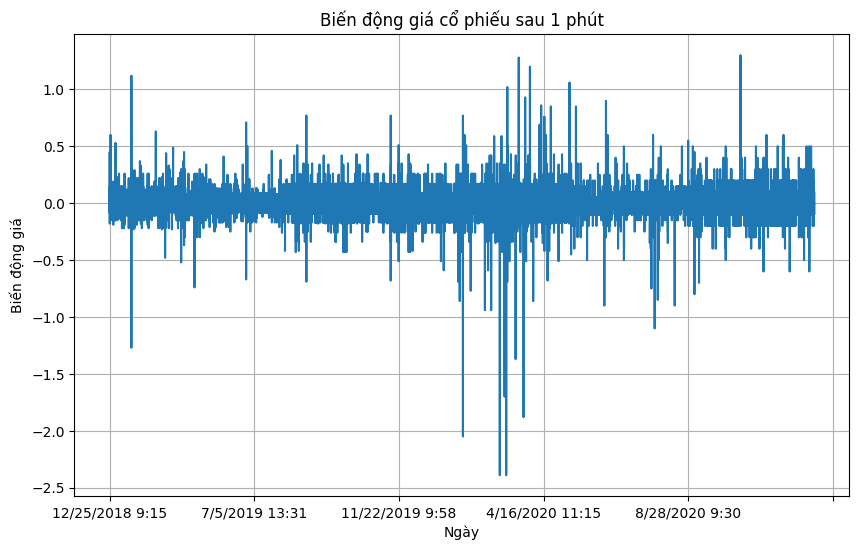

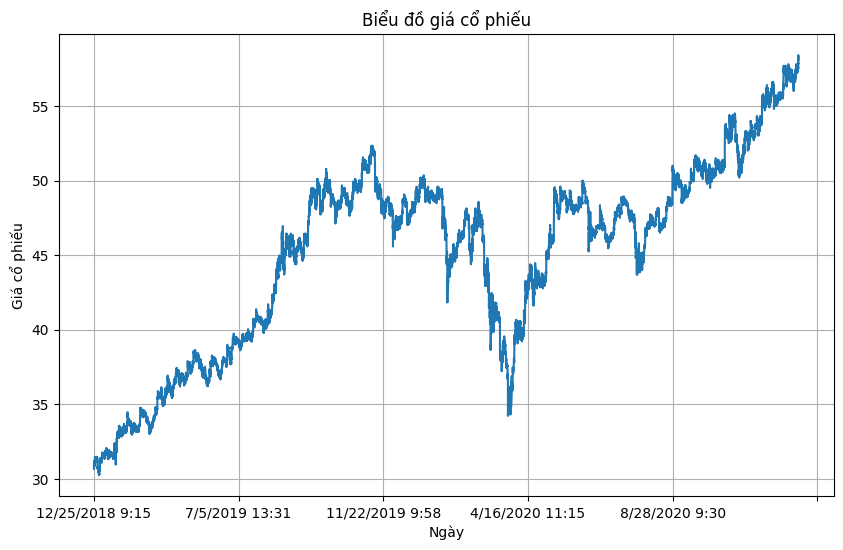

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv("/content/drive/MyDrive/data/FPT.csv")

# Đặt cột "Date/Time" làm chỉ số của DataFrame
df.set_index('Date/Time', inplace=True)

# Tính toán biến động giá cổ phiếu sau 1 phút
price_volatility = df['Close'].shift(-1) - df['Close']

# Vẽ biểu đồ biến động giá
plt.figure(figsize=(10, 6))
price_volatility.plot()
plt.title('Biến động giá cổ phiếu sau 1 phút')
plt.xlabel('Ngày')
plt.ylabel('Biến động giá')
plt.grid(True)
plt.show()

# Vẽ biểu đồ giá cổ phiếu
plt.figure(figsize=(10, 6))
df['Close'].plot()
plt.title('Biểu đồ giá cổ phiếu')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.grid(True)
plt.show()



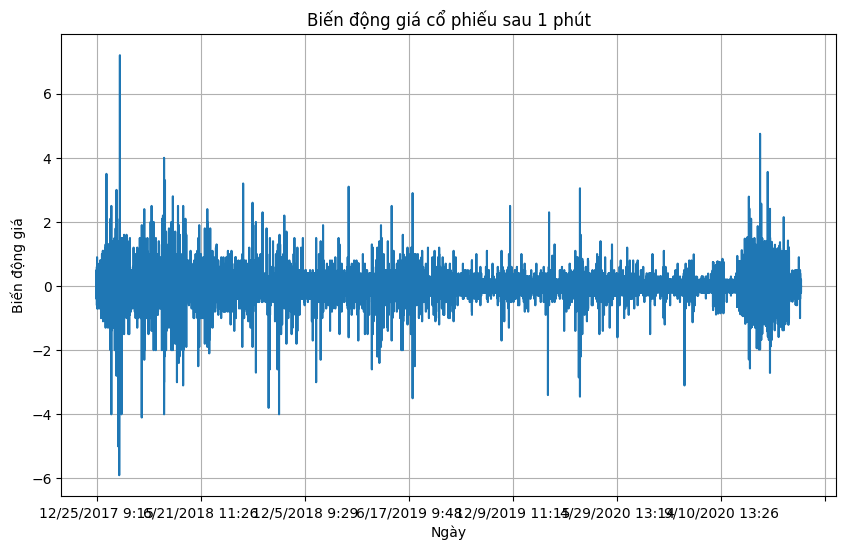

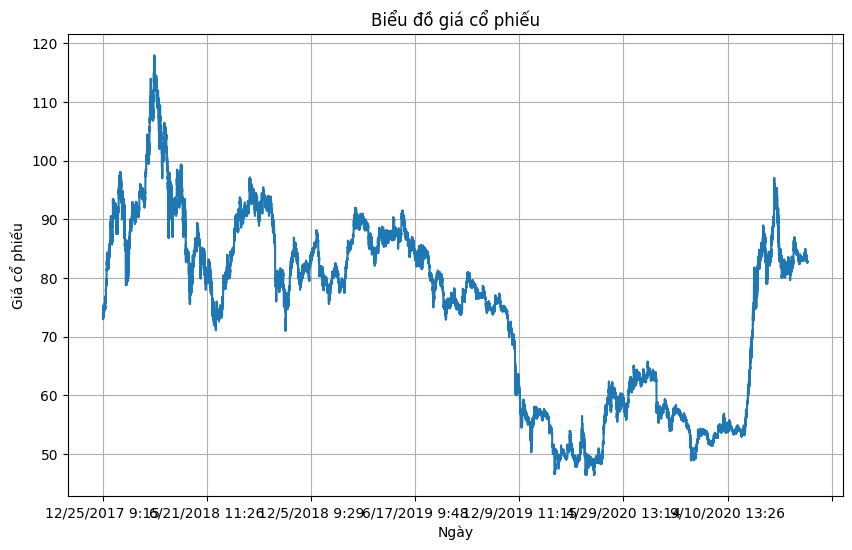

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv("/content/drive/MyDrive/data/MSN.csv")

# Đặt cột "Date/Time" làm chỉ số của DataFrame
df.set_index('Date/Time', inplace=True)

# Tính toán biến động giá cổ phiếu sau 1 phút
price_volatility = df['Close'].shift(-1) - df['Close']

# Vẽ biểu đồ biến động giá
plt.figure(figsize=(10, 6))
price_volatility.plot()
plt.title('Biến động giá cổ phiếu sau 1 phút')
plt.xlabel('Ngày')
plt.ylabel('Biến động giá')
plt.grid(True)
plt.show()

# Vẽ biểu đồ giá cổ phiếu
plt.figure(figsize=(10, 6))
df['Close'].plot()
plt.title('Biểu đồ giá cổ phiếu')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.grid(True)
plt.show()



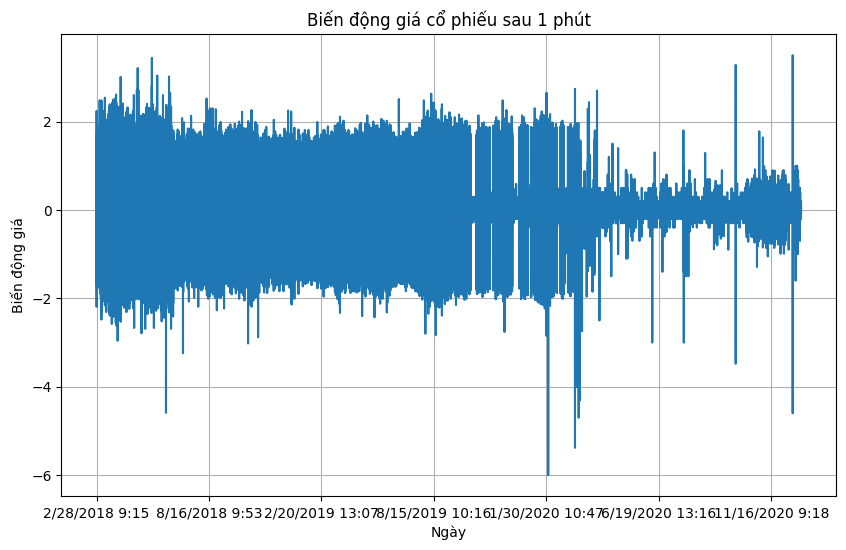

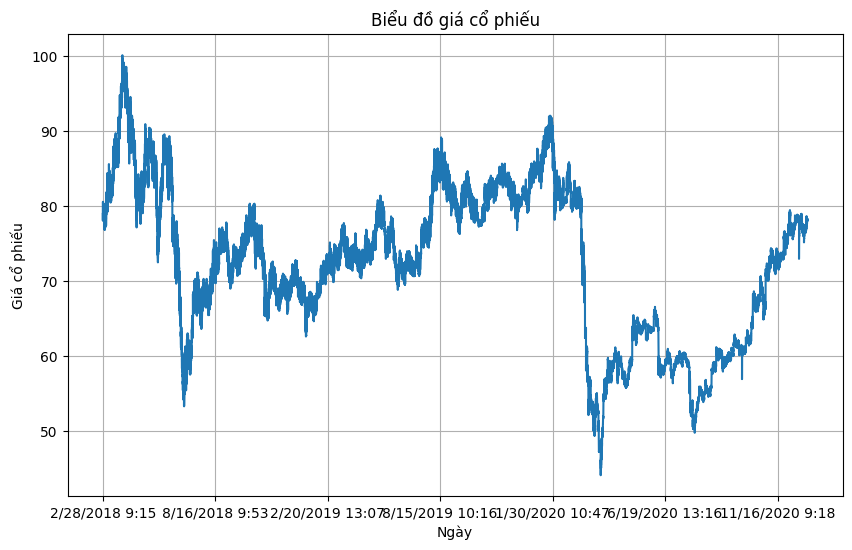

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv("/content/drive/MyDrive/data/PNJ.csv")

# Đặt cột "Date/Time" làm chỉ số của DataFrame
df.set_index('Date/Time', inplace=True)

# Tính toán biến động giá cổ phiếu sau 1 phút
price_volatility = df['Close'].shift(-1) - df['Close']

# Vẽ biểu đồ biến động giá
plt.figure(figsize=(10, 6))
price_volatility.plot()
plt.title('Biến động giá cổ phiếu sau 1 phút')
plt.xlabel('Ngày')
plt.ylabel('Biến động giá')
plt.grid(True)
plt.show()

# Vẽ biểu đồ giá cổ phiếu
plt.figure(figsize=(10, 6))
df['Close'].plot()
plt.title('Biểu đồ giá cổ phiếu')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import os
from tensorflow.keras.layers import Dropout
from datetime import datetime, timedelta

In [ ]:
# Hàm đọc và tiền xử lý dữ liệu từ file CSV
def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df.drop_duplicates(inplace=True)
    df = df[['Ticker', 'Date/Time', 'Close']]  # Corrected column selection
    return df

# Hàm tạo dữ liệu cho mô hình LSTM
def create_lstm_dataset(data, sequence_length=10):
    sequences = []
    next_price_volatility = []
    for i in range(len(data) - sequence_length):
        sequence = data['Close'].values[i:i+sequence_length]
        sequences.append(sequence)
        price_volatility = data['Close'].values[i+sequence_length] - data['Close'].values[i]
        next_price_volatility.append(price_volatility)
    return np.array(sequences), np.array(next_price_volatility)

# Đường dẫn tới thư mục chứa dữ liệu
data_folder = "/content/drive/MyDrive/data/"

# Đọc và tiền xử lý dữ liệu từ các file CSV trong thư mục data
dfs = []
for file_name in os.listdir(data_folder):
    file_path = os.path.join(data_folder, file_name)
    if file_path.endswith('.csv'):
        df = preprocess_data(file_path)
        dfs.append(df)

# Kết hợp dữ liệu từ tất cả các file thành một DataFrame
data = pd.concat(dfs, ignore_index=True)

In [ ]:
# Tạo dữ liệu cho mô hình LSTM
X, y = create_lstm_dataset(data)

# In thông tin về dữ liệu
print("Kích thước dữ liệu:", data.shape)
print("Kiểu dữ liệu của dữ liệu đầu ra:", type(y[0]))

# Kiểm tra số lượng chuỗi và giá trị biến động giá
sequences, next_price_volatility = create_lstm_dataset(data)
print("Số lượng chuỗi:", len(sequences))
print("Số lượng giá trị biến động giá:", len(next_price_volatility))

# Kiểm tra số lượng dữ liệu thiếu trong dataframe
print("Số lượng dữ liệu thiếu trong dataframe:")
print(data.isnull().sum())

Kích thước dữ liệu: (459335, 3)
Kiểu dữ liệu của dữ liệu đầu ra: <class 'numpy.float64'>
Số lượng chuỗi: 459325
Số lượng giá trị biến động giá: 459325
Số lượng dữ liệu thiếu trong dataframe:
Ticker       0
Date/Time    0
Close        0
dtype: int64


In [ ]:
# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu
X_scaled = scaler.fit_transform(X)

# Chia tập dữ liệu thành dữ liệu huấn luyện và dữ liệu kiểm tra (80%-20%)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Xây dựng mô hình CNN
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

# Huấn luyện mô hình
history = model.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_data=(X_test_scaled, y_test),
                    callbacks=[EarlyStopping(patience=10)])

Epoch 1/40
11484/11484 [==============================] - 43s 4ms/step - loss: 0.2853 - val_loss: 0.2687
Epoch 2/40
11484/11484 [==============================] - 42s 4ms/step - loss: 0.2198 - val_loss: 0.2269
Epoch 3/40
11484/11484 [==============================] - 39s 3ms/step - loss: 0.2003 - val_loss: 0.1975
Epoch 4/40
11484/11484 [==============================] - 40s 3ms/step - loss: 0.1919 - val_loss: 0.1881
Epoch 5/40
11484/11484 [==============================] - 52s 4ms/step - loss: 0.1829 - val_loss: 0.1727
Epoch 6/40
11484/11484 [==============================] - 47s 4ms/step - loss: 0.1722 - val_loss: 0.1607
Epoch 7/40
11484/11484 [==============================] - 52s 5ms/step - loss: 0.1641 - val_loss: 0.1564
Epoch 8/40
11484/11484 [==============================] - 47s 4ms/step - loss: 0.1601 - val_loss: 0.1508
Epoch 9/40
11484/11484 [==============================] - 53s 5ms/step - loss: 0.1572 - val_loss: 0.1531
Epoch 10/40
11484/11484 [==============================

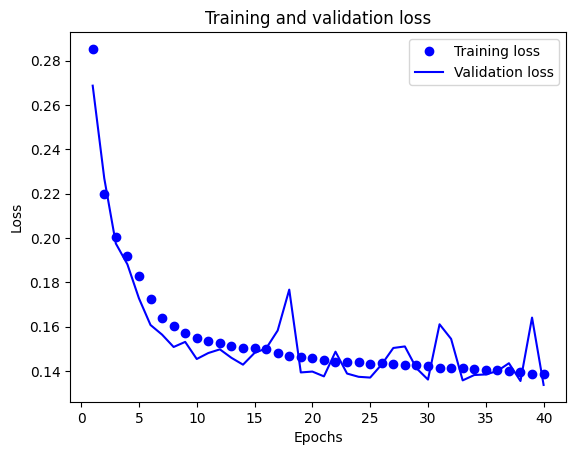

In [ ]:
import matplotlib.pyplot as plt

# Lấy thông tin lịch sử từ mô hình
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Vẽ biểu đồ loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

2871/2871 [==============================] - 5s 2ms/step
Mean Squared Error: 0.13367368498526722


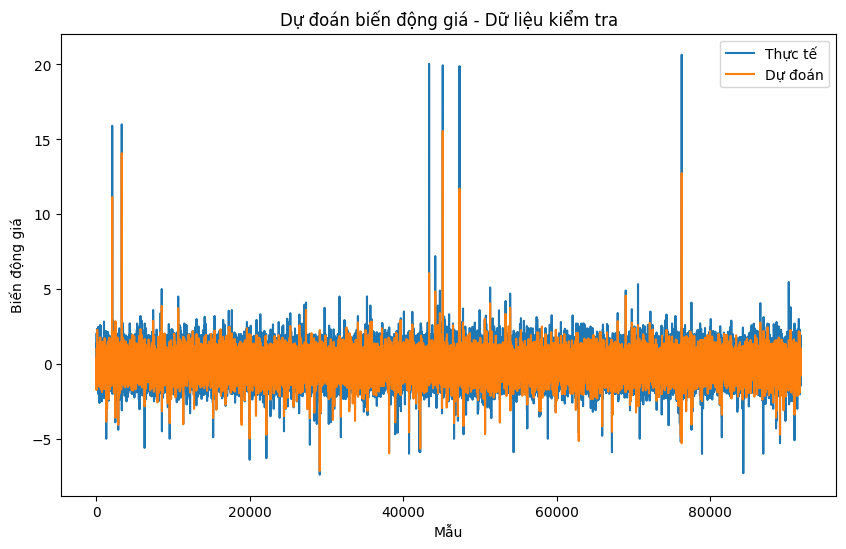

In [ ]:
from sklearn.metrics import mean_squared_error

# Dự đoán giá trị biến động giá của dữ liệu kiểm tra
y_pred = model.predict(X_test_scaled)

# Đánh giá hiệu suất của mô hình
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Vẽ biểu đồ dự đoán và giá trị thực tế
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Thực tế')
plt.plot(y_pred, label='Dự đoán')
plt.xlabel('Mẫu')
plt.ylabel('Biến động giá')
plt.title('Dự đoán biến động giá - Dữ liệu kiểm tra')
plt.legend()
plt.show()

In [ ]:
# Save the model to HDF5 file
model.save("/content/drive/MyDrive/data/model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
